**TASK 4**

Using the diabetes dataset, build the multilinear regression model and perform the following
1. Split the dataset for training and testing
2. Display the intercepts/constant values calculated
3. Calculate the accuracy of the model
4. Draw the comparison graph with y and predicted y
5. Predict the person is diabetic or not for the new input feature
 “Female,36,0,0,current,32.27,6.2,220”

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import gdown

# Google Drive link
url = "https://drive.google.com/uc?id=12G6B0cEBWd69QzxzM3ZGe9CyFlE7KD8m"
output = "diabetes_data.csv"

# Download the dataset
gdown.download(url, output, quiet=False)

# Load into a DataFrame
df = pd.read_csv(output)


Downloading...
From: https://drive.google.com/uc?id=12G6B0cEBWd69QzxzM3ZGe9CyFlE7KD8m
To: /content/diabetes_data.csv
100%|██████████| 3.81M/3.81M [00:00<00:00, 31.5MB/s]


In [ ]:
# 1 Preprocessing: Convert Categorical to Numerical ###
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])  # Male = 1, Female = 0
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])  # Encode smoking history

# Select Features (X) and Target (y)
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
        'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']  # Target Variable (Diabetic: 1, Non-Diabetic: 0)

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into Train (80%) & Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
### 2️ Train Multiple Linear Regression Model ###
model = LinearRegression()
model.fit(X_train, y_train)

# Get Intercept & Coefficients
print(f"\nIntercept (Constant): {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept (Constant): 0.08471045547824076
Coefficients: [0.00658465 0.03125898 0.02446486 0.023261   0.00502655 0.02725625
 0.08725257 0.09268294]


In [ ]:
### 3️ Predict & Calculate Accuracy ###
y_pred = model.predict(X_test)

# Convert predictions to binary class (Threshold = 0.5)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%")


✅ Model Accuracy: 93.86%


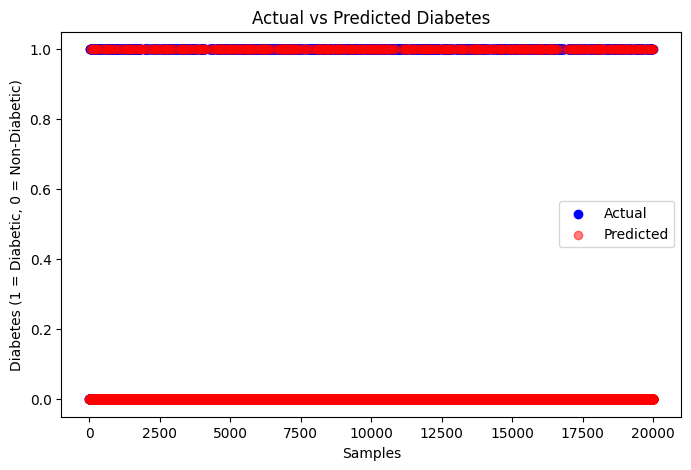

In [ ]:
### 4️ Comparison Graph (Actual vs Predicted) ###
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_binary)), y_pred_binary, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Diabetes (1 = Diabetic, 0 = Non-Diabetic)')
plt.legend()
plt.title('Actual vs Predicted Diabetes')
plt.show()


In [ ]:
## 5️ Predict for New Sample: "Female, 36, 0, 0, current, 32.27, 6.2, 220" ###
new_sample = np.array([[0, 36, 0, 0, label_enc.transform(['current'])[0], 32.27, 6.2, 220]])
new_sample_scaled = scaler.transform(new_sample)

predicted_diabetes = model.predict(new_sample_scaled)[0]
predicted_class = 1 if predicted_diabetes > 0.5 else 0

print(f"\n🔹 Predicted Diabetes for new input: {predicted_class} (1=Diabetic, 0=Non-Diabetic)")



🔹 Predicted Diabetes for new input: 0 (1=Diabetic, 0=Non-Diabetic)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
